In [1]:
import numpy as np 
import pandas as pd
import os
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import datetime as dt
import datetime


In [2]:
weather = pd.read_csv('testset.csv')
weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


### Parsing the datetime_uts column and separating them as year, month, day and hour

In [3]:
Date = pd.to_datetime(weather['datetime_utc'])
weather['year'] = Date.dt.year
weather['month'] = Date.dt.month
weather['day'] = Date.dt.day
weather['hour'] = Date.dt.hour

# Data Cleaning

### Checking the percentage of valid values in a column

In [12]:
for cols in weather.columns:
    print("{: <15}: {}".format(cols, weather[cols].count()/weather.shape[0]))

datetime_utc   : 1.0
 _conds        : 0.9992870581245668
 _dewptm       : 0.9938508763243885
 _fog          : 1.0
 _hail         : 1.0
 _heatindexm   : 0.2886919496979899
 _hum          : 0.9925042083374591
 _precipm      : 0.0
 _pressurem    : 0.9977027428458263
 _rain         : 1.0
 _snow         : 1.0
 _tempm        : 0.9933359738587979
 _thunder      : 1.0
 _tornado      : 1.0
 _vism         : 0.9561540746608576
 _wdird        : 0.8538964253886523
 _wdire        : 0.8538964253886523
 _wgustm       : 0.010614912367561145
 _windchillm   : 0.005733240914942073
 _wspdm        : 0.9766511535795623
year           : 1.0
month          : 1.0
day            : 1.0
hour           : 1.0


## As percentage of valid values in ' _windchillm',' _wgustm', ' _precipm' are very low, we can safely remove them

In [13]:
#weather.drop([ ' _windchillm',' _wgustm', ' _precipm'], inplace=True, axis =1)

### Plotting values

In [80]:
plt.style.use('seaborn-poster')

### Defining columns to be plotted in the notebook

In [15]:
weather_plot = weather[[' _dewptm', ' _fog', ' _hail',' _hum',
       ' _heatindexm', ' _hum', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wspdm']]


### Plotting raw data

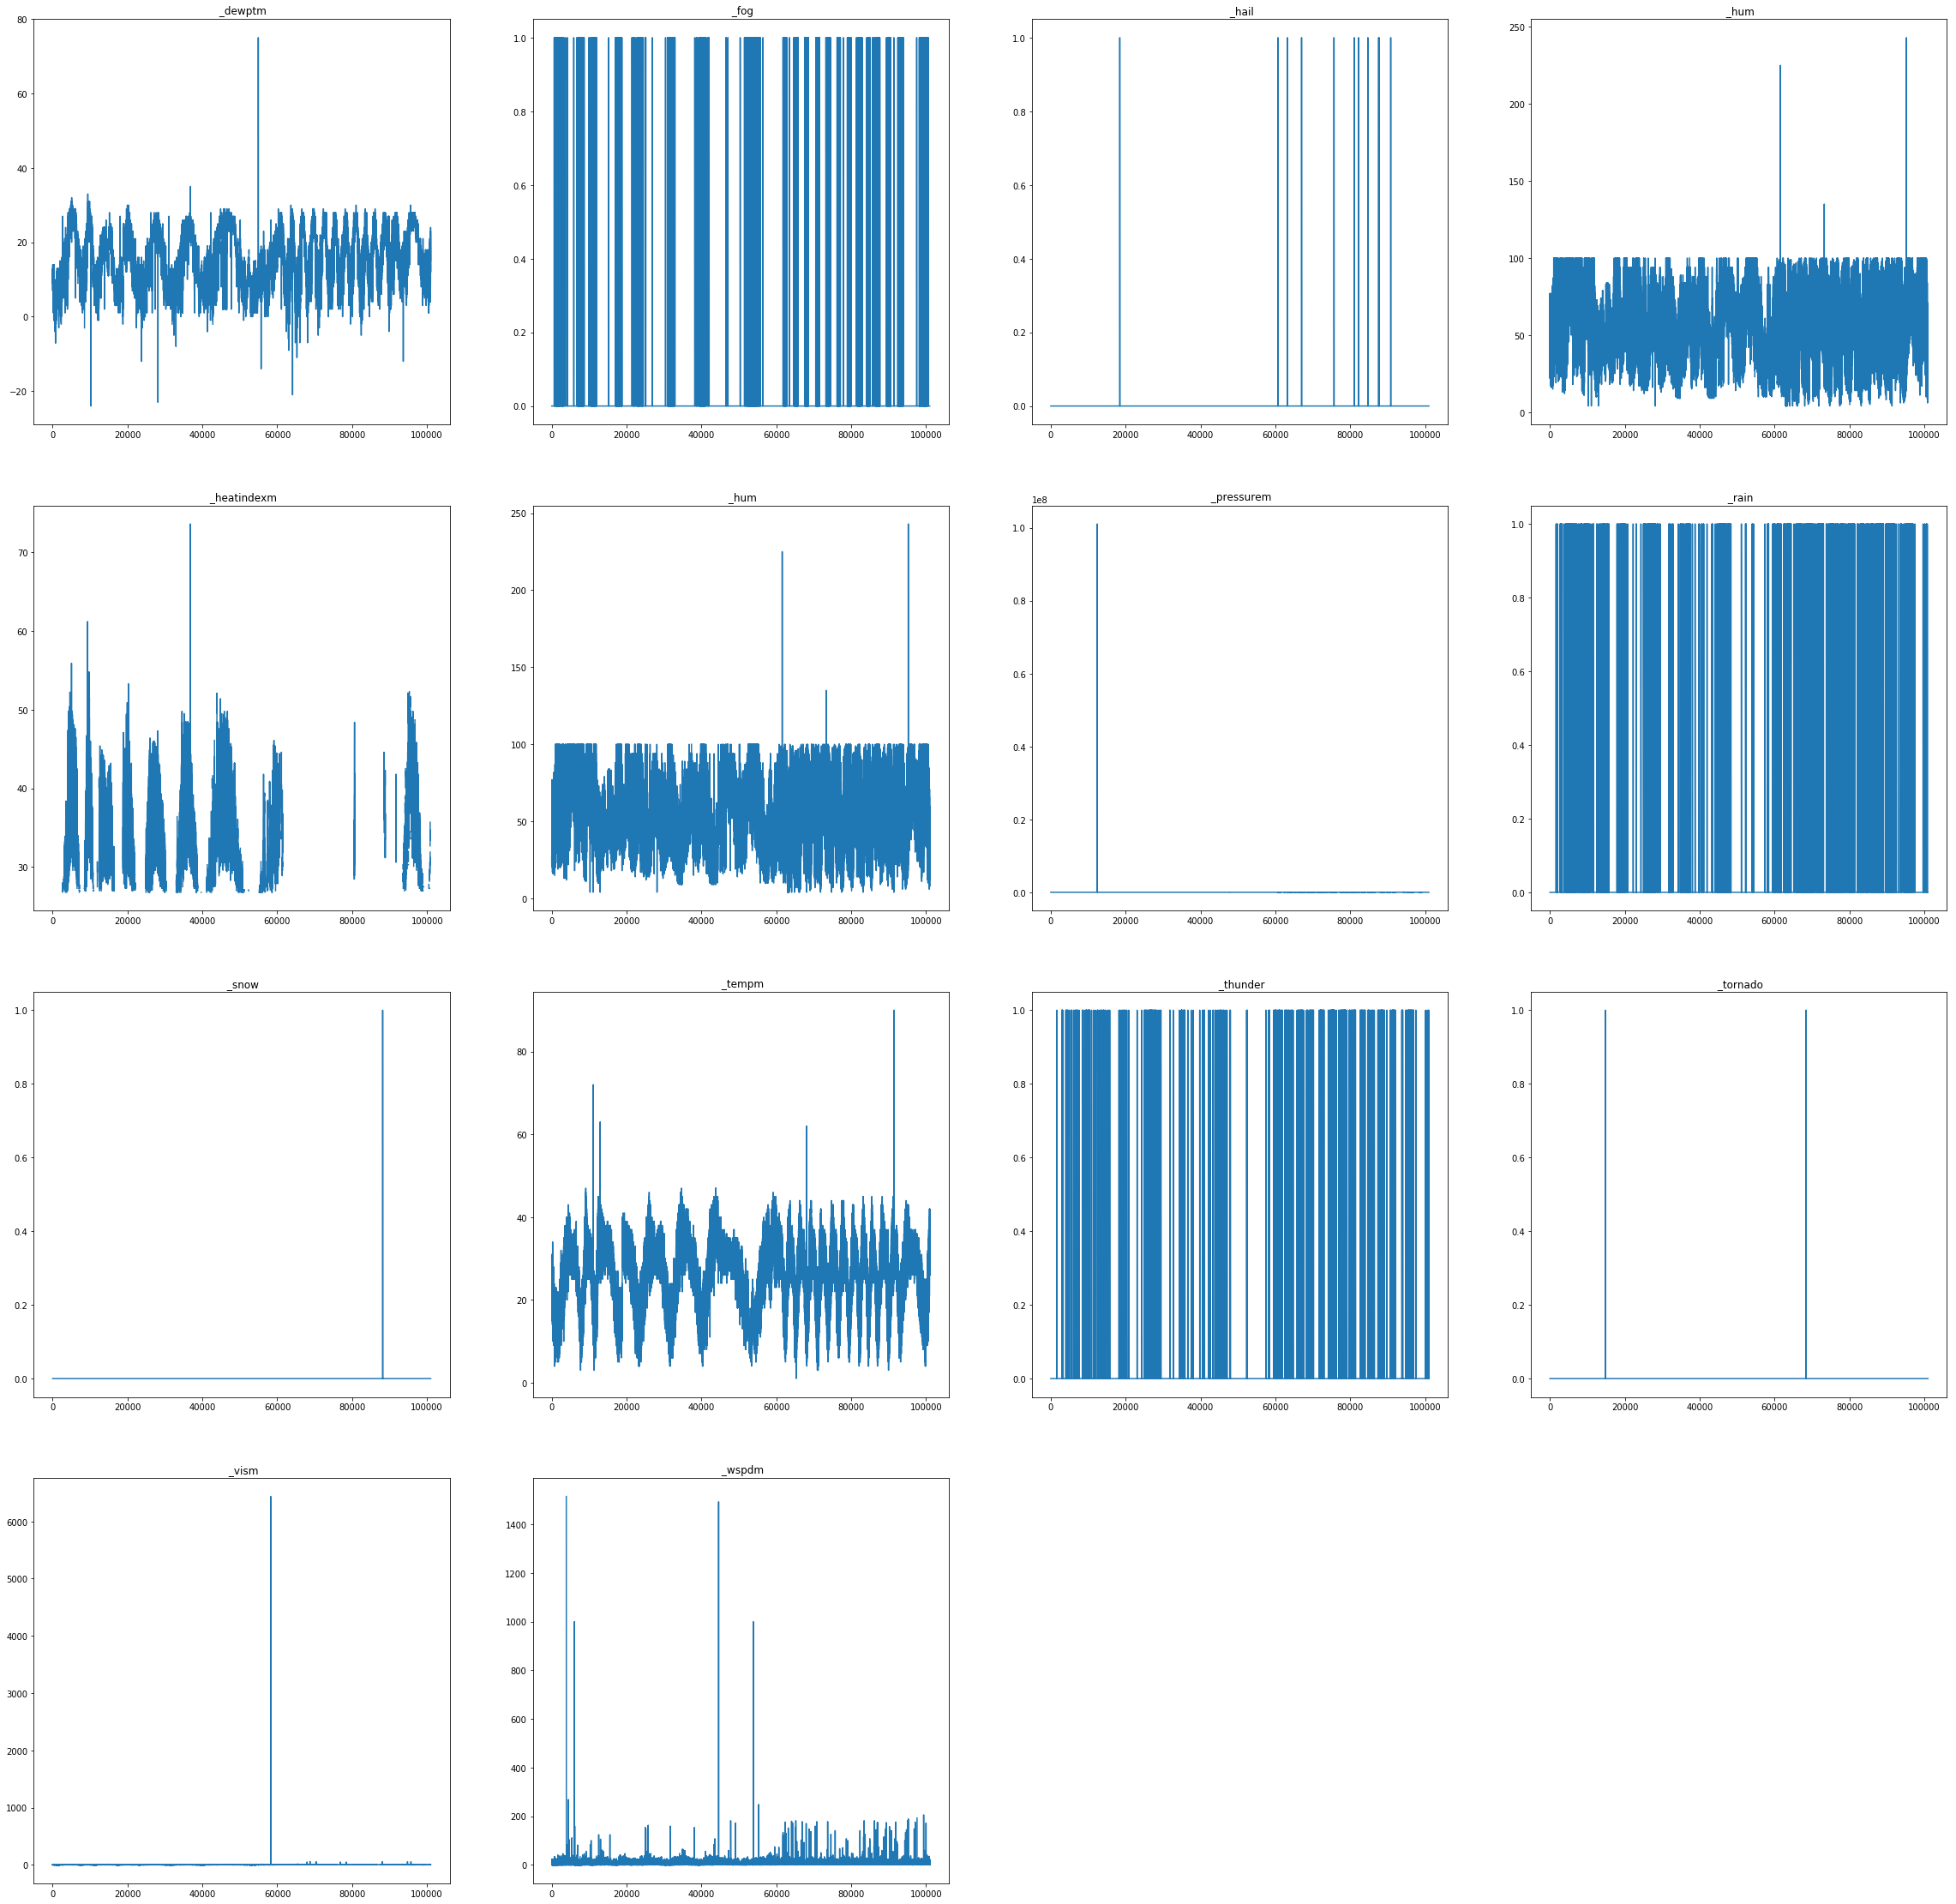

In [16]:
plt.subplots(figsize=(40,40))
count = int(1)
for i in weather_plot.columns:
    plt.subplot(4,4,count)
    plt.title(i)
    plt.plot(weather[i])
    count = count+1

### As we can see, most columns have some outliers, removing them using IQR method

# Using IQR 

### Removing non integer columns as computations can't be done on them


In [17]:
#weather_to_clean = weather.drop([' _wdire',' _conds', 'datetime_utc'],axis=1)

In [18]:
Q1=weather_to_clean.quantile(0.07)

Q3=weather_to_clean.quantile(0.93)


IQR=Q3-Q1

weather_refined = weather_to_clean[~((weather_to_clean < (Q1 - 1.5 * IQR)) |(weather_to_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

print(len(weather_refined))



90084


### Plotting raw data

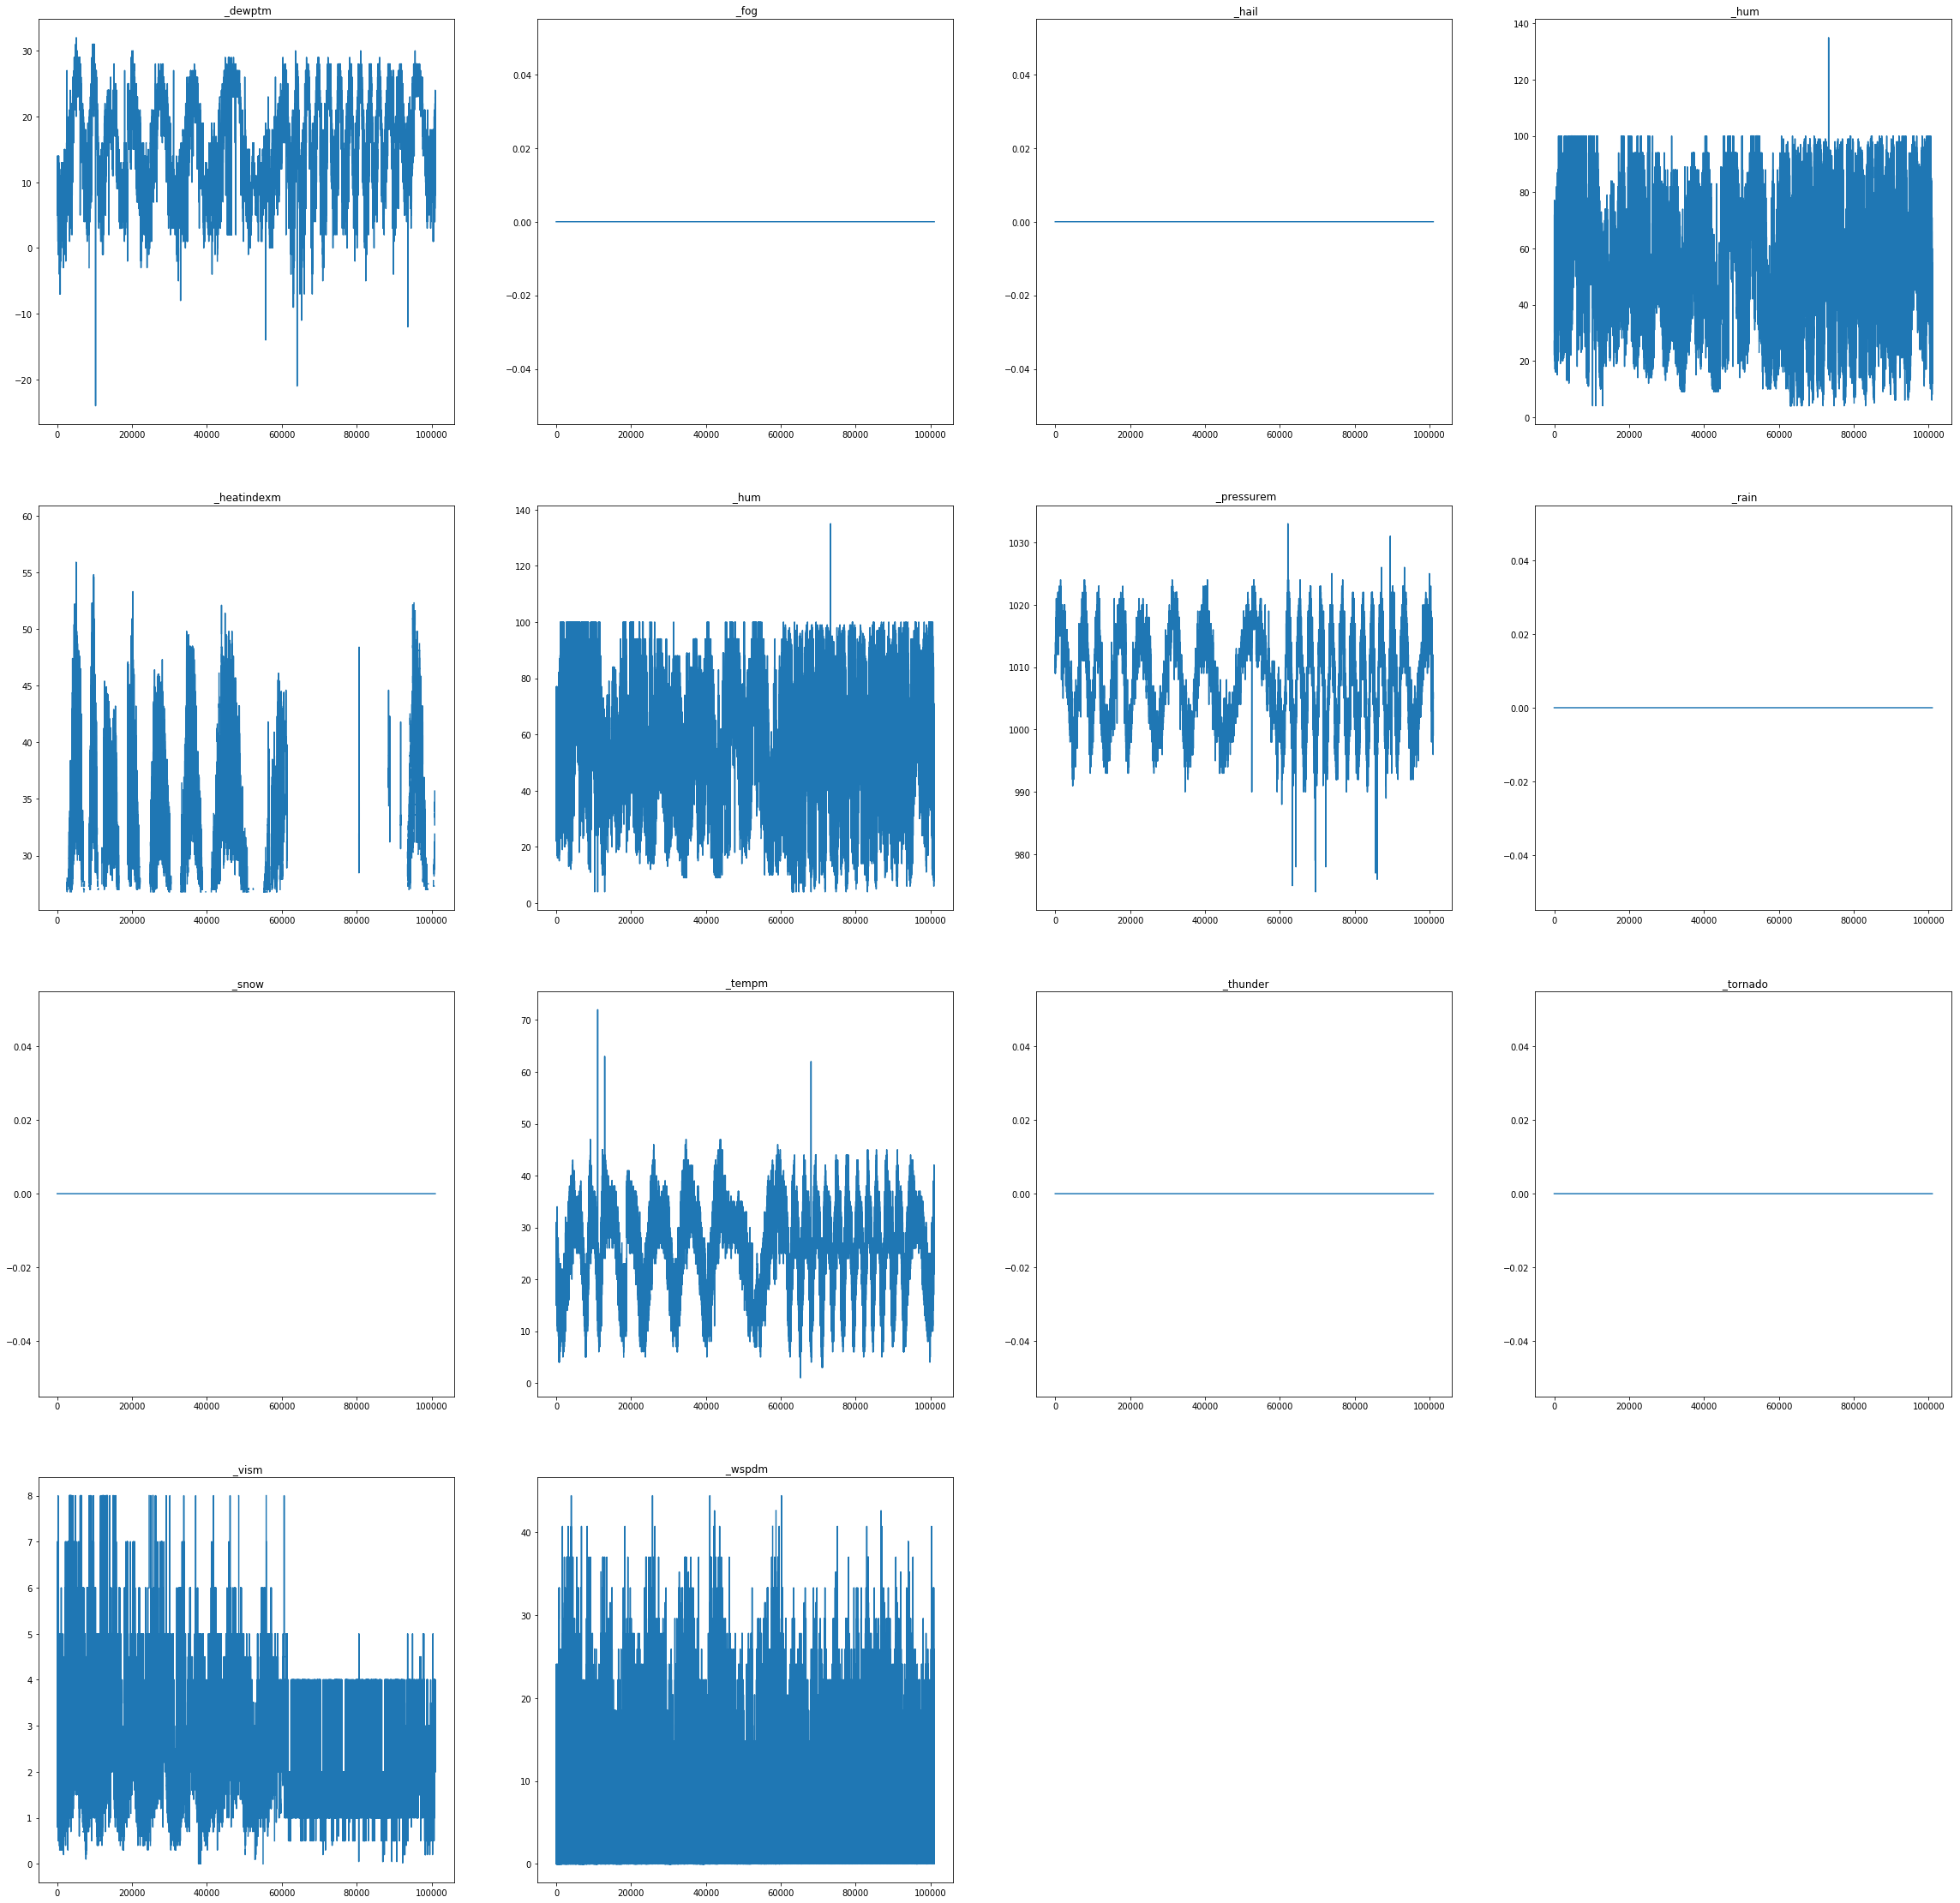

In [19]:
plt.subplots(figsize=(40,40))
count = int(1)
for i in weather_plot.columns:
    plt.subplot(4,4,count)
    plt.title(i)
    plt.plot(weather_refined[i])
    count = count+1

### Now we can see, most outliers have been removed using IQR method

### Adding the removed conditions and wind direction columns back to the dataset

In [20]:
weather = weather_to_clean.join(weather[[' _conds', ' _wdire']])

# Plotting data yearwise for each column

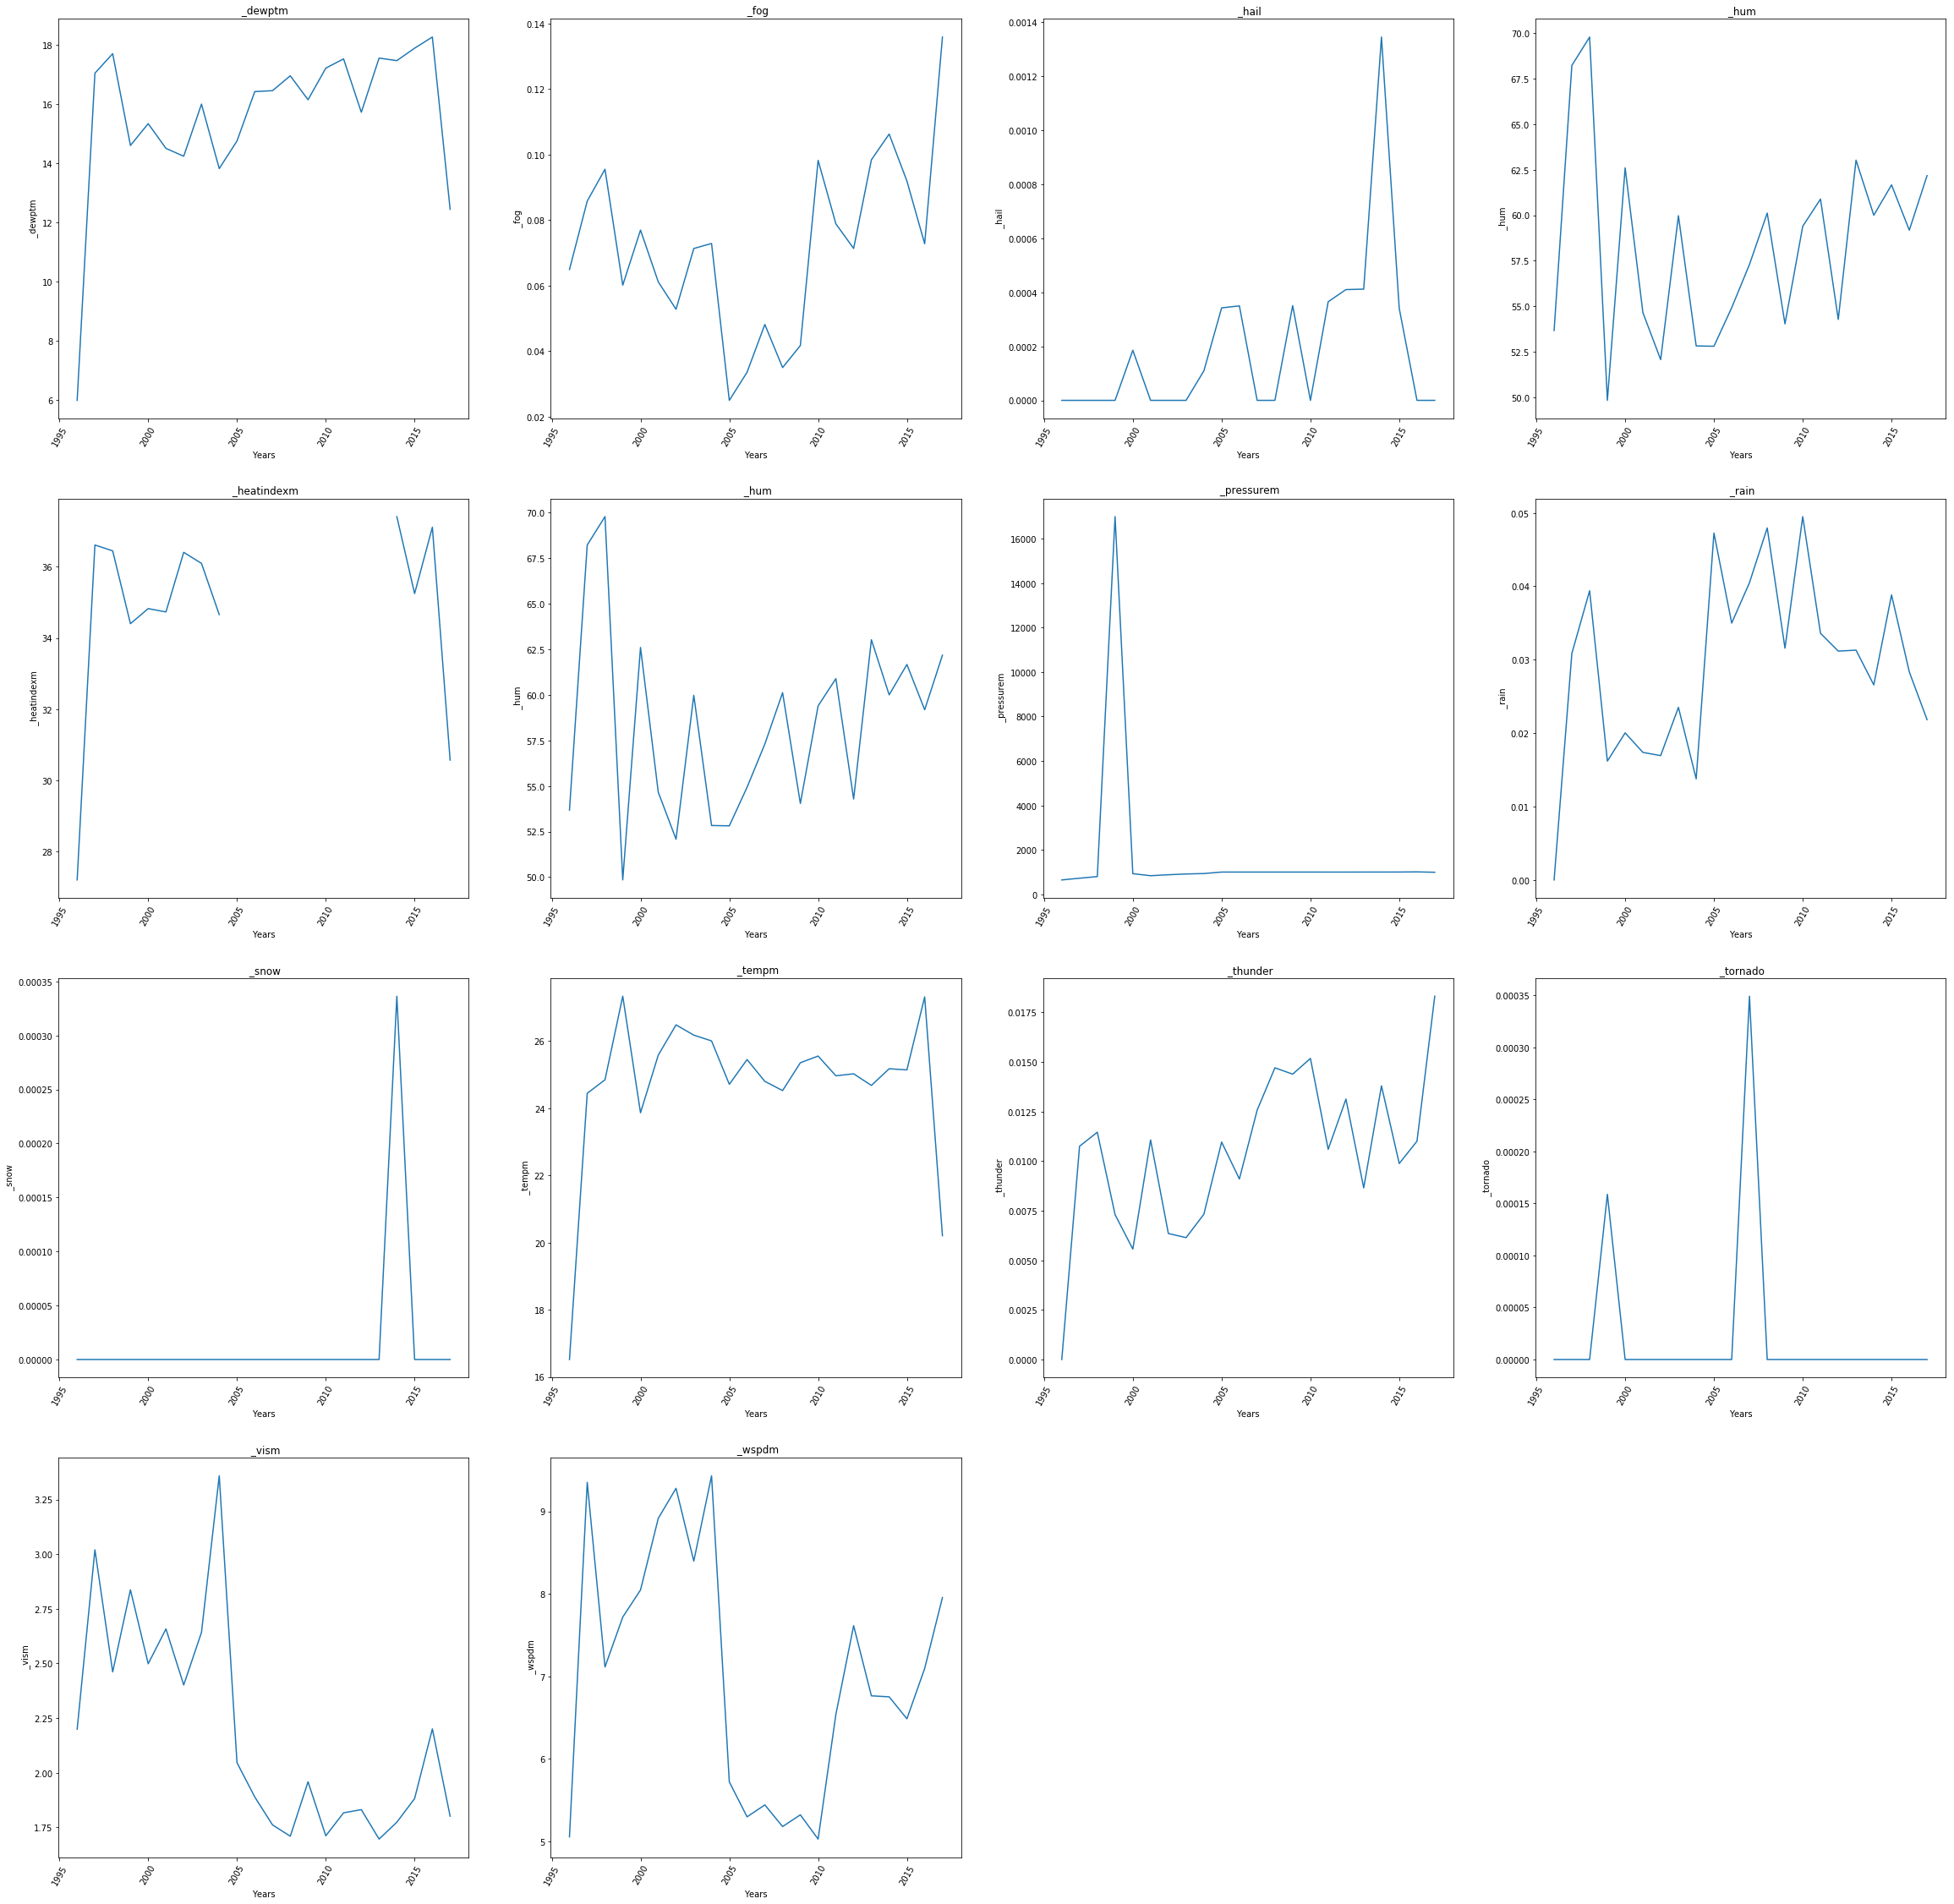

In [21]:
year_wise = weather.groupby('year').mean()

plt.subplots(figsize=(40,40))
count = int(1)
for i in weather_plot.columns:
    plt.subplot(4,4,count)
    plt.title(i)
    plt.xlabel("Years")
    plt.ylabel(i)
    plt.xticks(rotation=60)
    plt.plot(year_wise[i])
    count = count+1


# Plotting data monthwise for each column

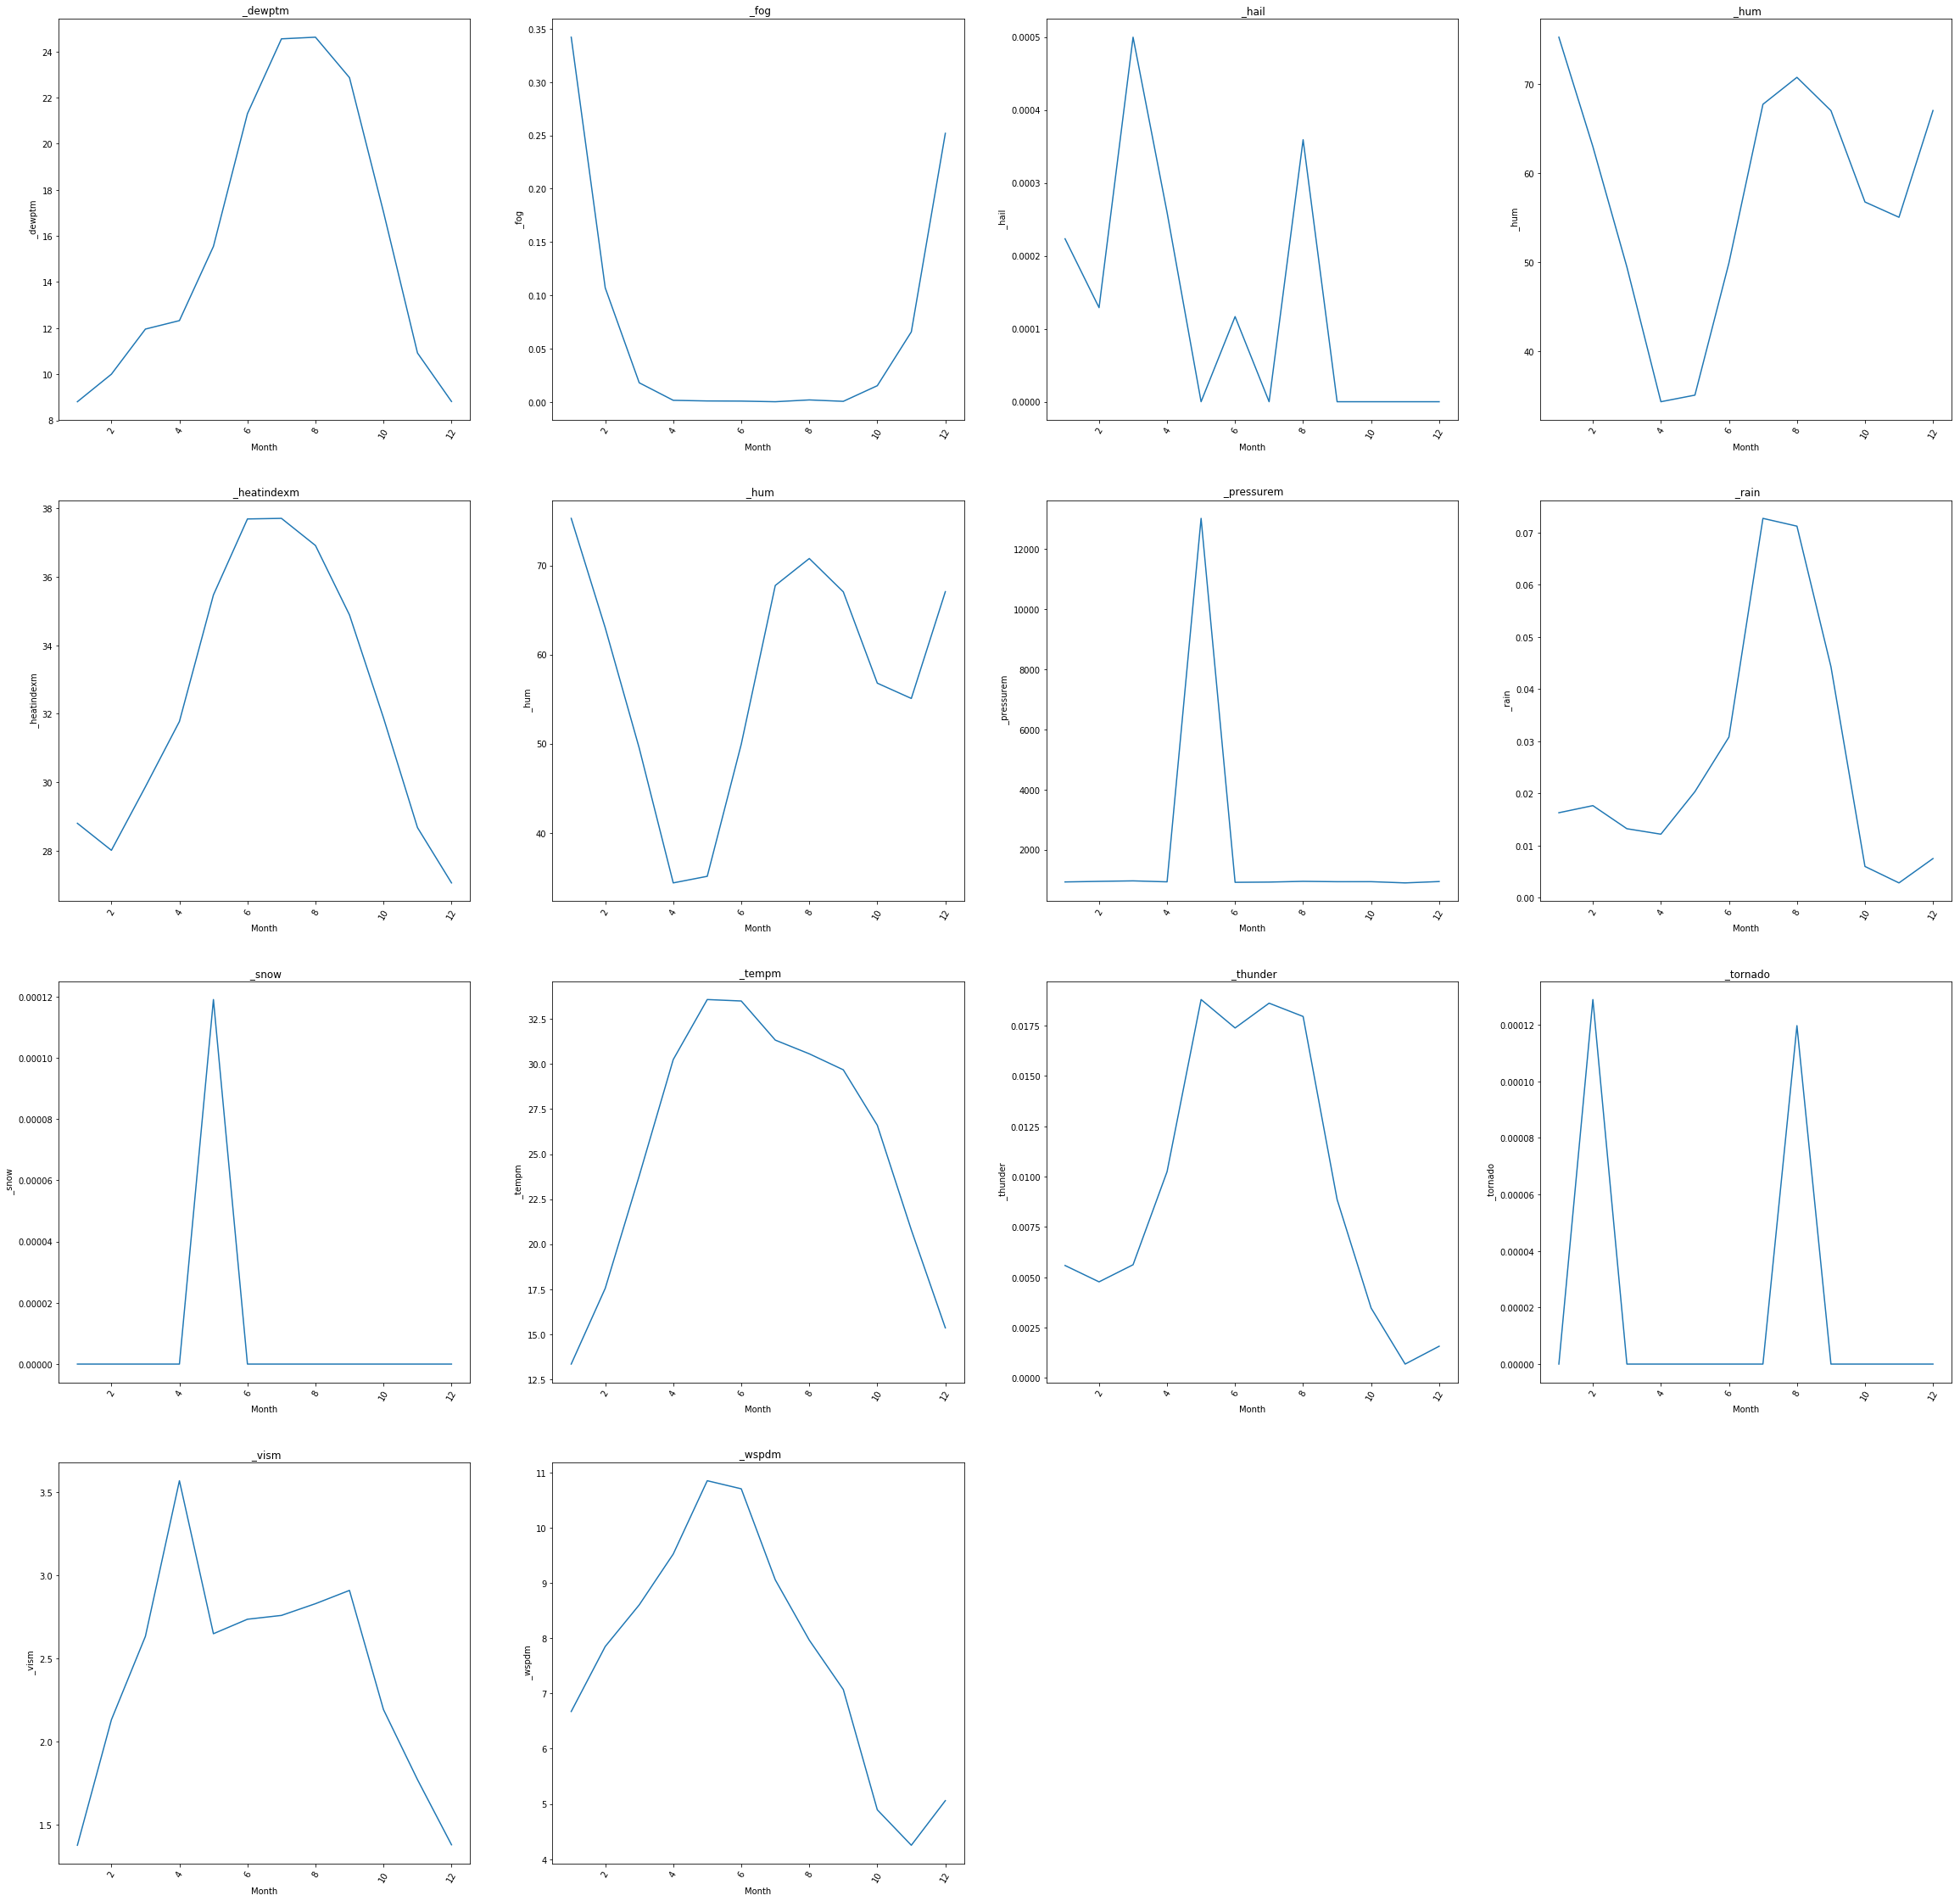

In [22]:
month_wise = weather.groupby('month').mean()

plt.subplots(figsize=(40,40))
count = int(1)
for i in weather_plot.columns:
    plt.subplot(4,4,count)
    plt.title(i)
    plt.xlabel("Month")
    plt.ylabel(i)
    plt.xticks(rotation=60)
    plt.plot(month_wise[i])
    count = count+1

# Plotting pie charts for each month according to weather conditions

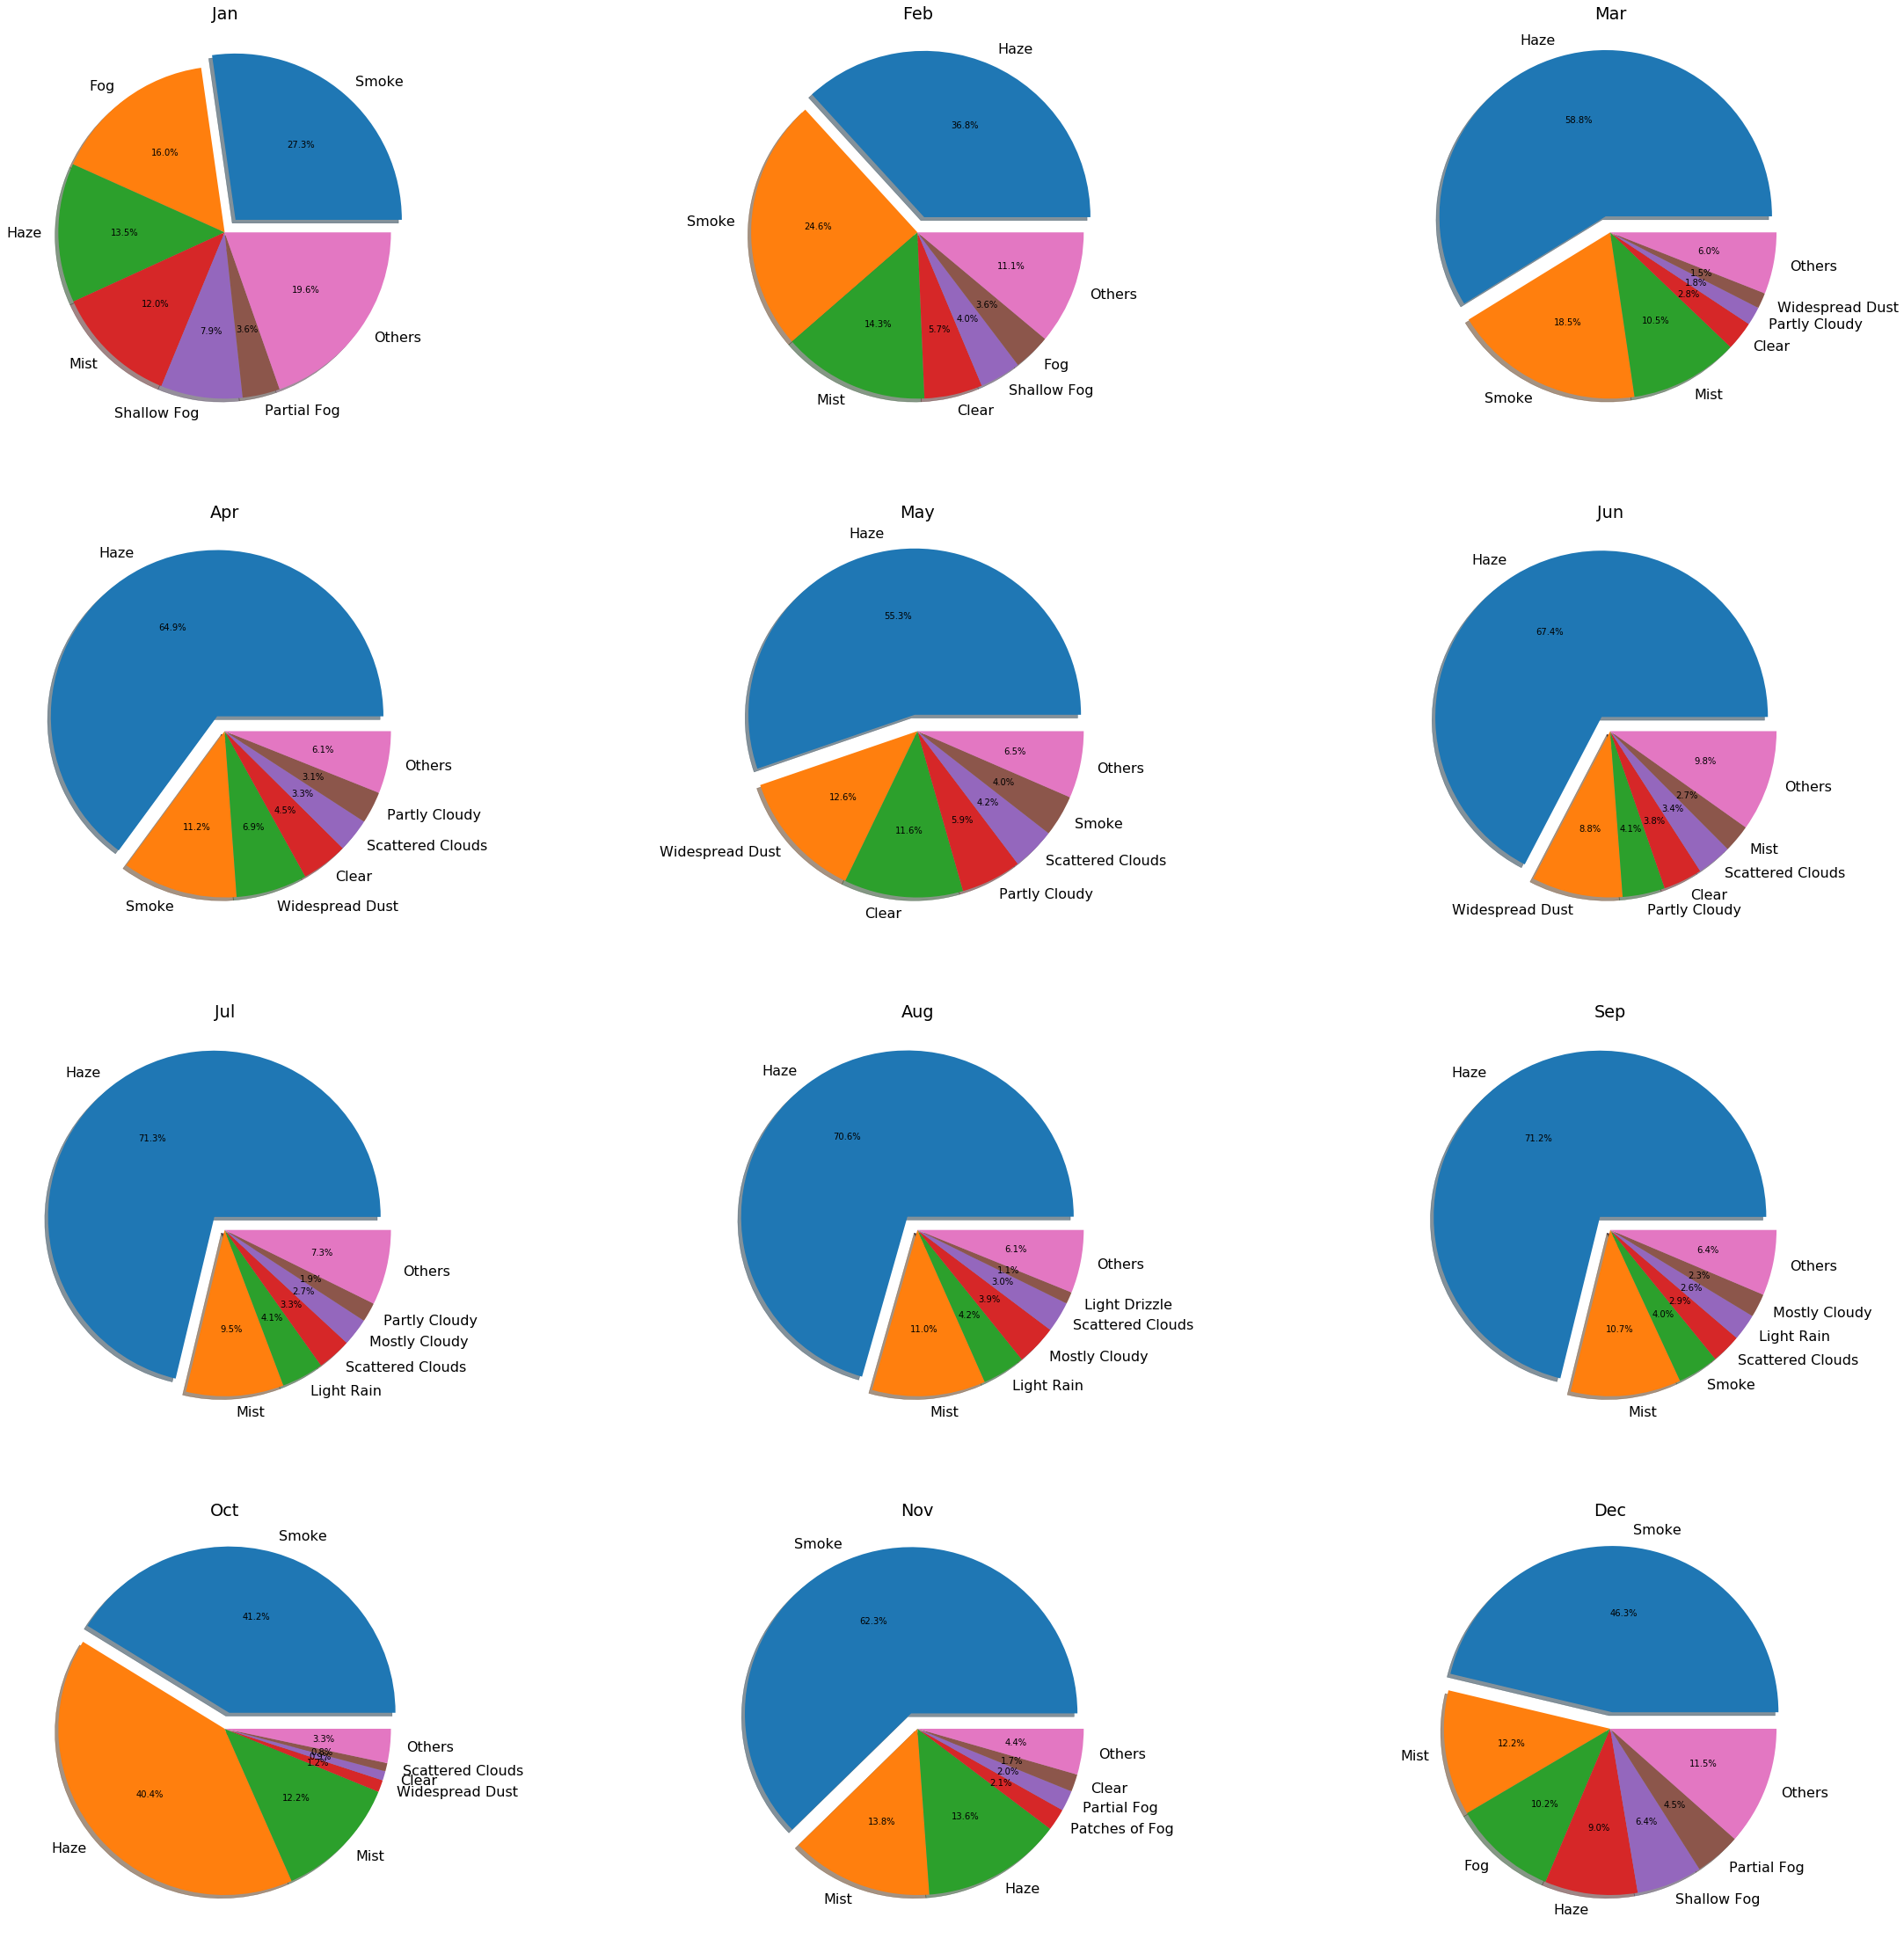

In [81]:
month_dict ={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

plt.subplots(figsize=(40,40))
count = int(1)
month_group = weather.groupby('month')
for i,group in month_group:
    plt.subplot(4,3,count)  
    plt.title(month_dict[i])
    month_data = group[' _conds'].value_counts(sort=True, ascending=False)
    explode = (0.1,0,0,0,0,0,0)
    
    #Selecting top 6 values as otherwise many low values will also be plotted
    labels = month_data.index.tolist()[:6]
    sizes = month_data.tolist()[:6]
    
    #Adding all low values as title others in the pie-chart
    labels.append('Others')
    sizes.append(sum(month_data.tolist()[6:]))
    
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, explode=explode)
    count = count+1
plt.show()
